In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
savings_data = "savingsrate.csv"

In [3]:
savingsrate_df = pd.read_csv(savings_data, encoding="ISO-8859-1") 
savingsrate_df.head()

,DATE,PSAVERT
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [4]:
savingsrate_df = savingsrate_df.rename(columns=
                                      {"DATE":"Date",
                                      "PSAVERT": "Savings_rate"}
                                      )
savingsrate_df.head()

,Date,Savings_rate
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [62]:
# Extract date ranges to include 5yrs (60 mos) before and after each recession
savingsrate1973 = savingsrate_df.iloc[114:246].reset_index()
savingsrate1980 = savingsrate_df.iloc[198:330].reset_index()
savingsrate2001 = savingsrate_df.iloc[450:582].reset_index()
savingsrate2008 = savingsrate_df.iloc[534:666].reset_index()
savingsrate2020 = savingsrate_df.iloc[678:].reset_index()


In [60]:
#Combine each recession dataframe into one using concat and calculate mean for entire 10yr period
savings_10yr=pd.concat([savingsrate1973["Savings_rate"], savingsrate1980["Savings_rate"],savingsrate2001["Savings_rate"],
                        savingsrate2008["Savings_rate"],savingsrate2020["Savings_rate"]],
                       axis=1, keys=['1973', '1980', '2001', '2008','2020'])
round(savings_10yr.mean(),2)

1973    12.13
1980    10.89
2001     5.17
2008     5.67
2020     7.36
dtype: float64

In [7]:
#Before 1973 Recession savings avg
sav1973b = round(savingsrate1973.iloc[0:54]["Savings_rate"].mean(),2)

In [8]:
#After 1973 Recession savings avg
sav1973a = round(savingsrate1973.iloc[70:]["Savings_rate"].mean(),2)

In [9]:
#Before 1980 Recession savings avg
sav1980b = round(savingsrate1980.iloc[0:54]["Savings_rate"].mean(),2)

In [10]:
#After 1980 Recession savings avg
sav1980a = round(savingsrate1980.iloc[60:]["Savings_rate"].mean(),2)

In [11]:
#Before 2001 Recession savings avg
sav2001b = round(savingsrate2001.iloc[0:57]["Savings_rate"].mean(),2)

In [12]:
#After 2001 Recession savings avg
sav2001a = round(savingsrate2001.iloc[65:]["Savings_rate"].mean(),2)

In [13]:
#Before 2008 Recession savings avg
sav2008b = round(savingsrate2008.iloc[0:53]["Savings_rate"].mean(),2)

In [14]:
#After 2008 Recession savings avg
sav2008a = round(savingsrate2008.iloc[71:]["Savings_rate"].mean(),2)

In [30]:
# Present Day savings avg
sav2020p = round(savingsrate2020.iloc[0:]["Savings_rate"].mean(),2)

In [75]:
#Find the max/min savings_rate across all recessions
savings_complete = savingsrate_df.iloc[114:].reset_index()

max_save = savings_complete.loc[savings_complete['Savings_rate'].idxmax()]
min_save = savings_complete.loc[savings_complete['Savings_rate'].idxmin()]

print(f" Max_savings: {max_save[1]}, {max_save[2]} | Min_savings: {min_save[1]}, {min_save[2]}")

 Max_savings: 1975-05-01, 17.3 | Min_savings: 2005-07-01, 2.2


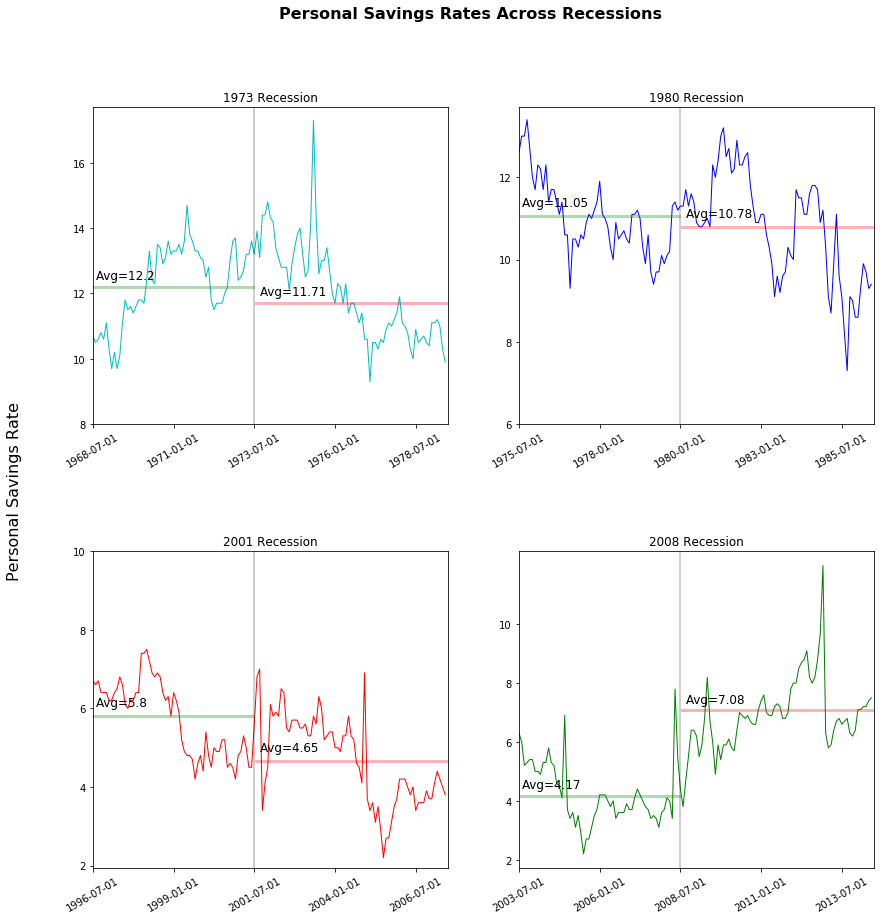

<Figure size 432x288 with 0 Axes>

In [19]:
# Create figure w/ 4 subplots; share x axis across subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim([0, 132])


fig.text(0.04, 0.5, 'Personal Savings Rate', va='center', rotation='vertical',fontsize=16)
   
fig.suptitle("Personal Savings Rates Across Recessions",fontsize=16,fontweight="bold")

# space between subplots
fig.subplots_adjust(hspace=0.40)

# ==========================Subplot 1973 ===================================================
ax1.plot(savingsrate1973["Date"], savingsrate1973["Savings_rate"],linewidth=1,color="c")
ax1.set_title("1973 Recession")

# x,y limits and ticks
ax1.set_yticks(np.arange(8, 18, 2))
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=30 )

# Before recession avg line
ax1.axhline(y=sav1973b,xmin=0,xmax=0.45, c='green', alpha=0.30, linewidth=3)
ax1.annotate(f"Avg={sav1973b}",(1,sav1973b+.25),fontsize=12,color="black")

# After recession avg line
ax1.axhline(y=sav1973a,xmin=0.46,xmax=1, c='red', alpha=0.30, linewidth=3)
ax1.annotate(f"Avg={sav1973a}",(62,sav1973a+.25),fontsize=12,color="black")

# vert line -recession start
ax1.axvline(x=60,c='black', alpha=0.25)

# ==============================Subplot 1980 ==============================================
ax2.plot(savingsrate1980["Date"], savingsrate1980["Savings_rate"], linewidth=1,  color="b")
ax2.set_title("1980 Recession")

ax2.set_yticks(np.arange(6, 14, 2))
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=30 )

# Before recession avg line
ax2.axhline(y=sav1980b,xmin=0,xmax=0.45, c='green', alpha=0.30, linewidth=3)
ax2.annotate(f"Avg={sav1980b}",(1,sav1980b+.25),fontsize=12,color="black")

# After recession avg line
ax2.axhline(y=sav1980a,xmin=0.46,xmax=1, c='red', alpha=0.30, linewidth=3)
ax2.annotate(f"Avg={sav1980a}",(62,sav1980a+.25),fontsize=12,color="black")

# vert line -recession start
ax2.axvline(x=60,c='black', alpha=0.25)

# ==============================Subplot 2001 ==========================================
ax3.plot(savingsrate2001["Date"], savingsrate2001["Savings_rate"], linewidth=1, color="r")
ax3.set_title("2001 Recession")

ax3.set_yticks(np.arange(2, 12, 2))
ax3.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=30 )

# Before recession avg line
ax3.axhline(y=sav2001b,xmin=0,xmax=0.45, c='green', alpha=0.30, linewidth=3)
ax3.annotate(f"Avg={sav2001b}",(1,sav2001b+.25),fontsize=12,color="black")

# After recession avg line
ax3.axhline(y=sav2001a,xmin=0.46,xmax=1, c='red', alpha=0.30, linewidth=3)
ax3.annotate(f"Avg={sav2001a}",(62,sav2001a+.25),fontsize=12,color="black")

# vert line -recession start
ax3.axvline(x=60,c='black', alpha=0.25)

# ======================================Subplot 2008 =====================================-
ax4.plot(savingsrate2008["Date"], savingsrate2008["Savings_rate"], linewidth=1,  color="g")
ax4.set_title("2008 Recession")

ax4.set_yticks(np.arange(2, 12,2))
ax4.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=30 )

# Before recession avg line
ax4.axhline(y=sav2008b,xmin=0,xmax=0.45, c='green', alpha=0.30, linewidth=3)
ax4.annotate(f"Avg={sav2008b}",(1,sav2008b+.25),fontsize=12,color="black")

# After recession avg line
ax4.axhline(y=sav2008a,xmin=0.46,xmax=1, c='red', alpha=0.30, linewidth=3)
ax4.annotate(f"Avg={sav2008a}",(62,sav2008a+.25),fontsize=12,color="black")

# vert line -recession start
ax4.axvline(x=60,c='black', alpha=0.25)


plt.show()

plt.savefig("Savings_rates.png")


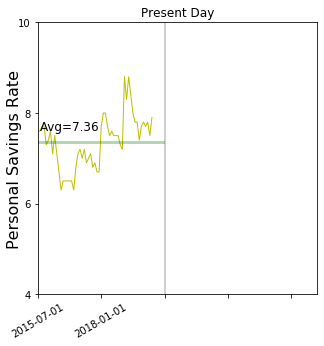

In [40]:

fig, ax5 = plt.subplots(1, figsize=(5, 5))

for ax in [ax5]:
    ax.set_xlim([0, 132])


fig.text(0.04, 0.5, 'Personal Savings Rate', va='center', rotation='vertical',fontsize=16)
   
#fig.suptitle(" ",fontsize=16,fontweight="bold")


# ========================Subplot Present Day ============================================
ax5.plot(savingsrate2020["Date"], savingsrate2020["Savings_rate"], linewidth=1,  color="y")
ax5.set_title("Present Day")

ax5.set_yticks(np.arange(4, 12, 2))
ax5.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=30 )

# Before recession avg line
ax5.axhline(y=sav2020p,xmin=0,xmax=0.45, c='green', alpha=0.30, linewidth=3)
ax5.annotate(f"Avg={sav2020p}",(1,sav2020p+.25),fontsize=12,color="black")

ax5.axvline(x=60,c='black', alpha=0.25)
# ================================================================================